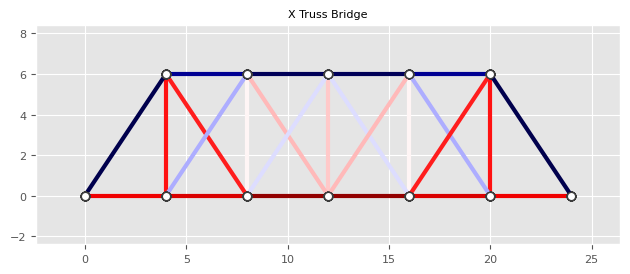

In [6]:
import numpy as np
from plane_trusses import analysis  # Importar la función de análisis para cerchas
from analisis_cerchas import *      # Importar funciones adicionales de análisis
import matplotlib.pyplot as plt     # Importar matplotlib para visualización

# -------------------------------
# Definición de nodos
# -------------------------------
# Cada fila representa un nodo con sus coordenadas (x, y)
nodes = np.array([
    [0.0, 0.0],    # Nodo 0: Soporte izquierdo
    [4.0, 0.0],    # Nodo 1
    [8.0, 0.0],    # Nodo 2
    [12.0, 0.0],   # Nodo 3
    [16.0, 0.0],   # Nodo 4
    [20.0, 0.0],   # Nodo 5
    [24.0, 0.0],   # Nodo 6: Soporte derecho
    [4.0, 6.0],    # Nodo 7: Nodo superior entre 0 y 1
    [8.0, 6.0],    # Nodo 8: Nodo superior entre 1 y 2
    [12.0, 6.0],   # Nodo 9: Nodo superior entre 2 y 3
    [16.0, 6.0],   # Nodo 10: Nodo superior entre 3 y 4
    [20.0, 6.0],   # Nodo 11: Nodo superior entre 4 y 5
])


# -------------------------------
# Definición de restricciones
# -------------------------------
# Las restricciones se definen para cada nodo como [x_constraint, y_constraint]
# Donde -1 = fijo, 0 = libre
cons = np.array([
    [-1, -1],  # Nodo 0: Fijo en x e y (Soporte izquierdo)
    [0, 0],    # Nodo 1: Libre en ambas direcciones
    [0, 0],    # Nodo 2: Libre en ambas direcciones
    [0, 0],    # Nodo 3: Libre en ambas direcciones
    [0, 0],    # Nodo 4: Libre en ambas direcciones
    [0, 0],    # Nodo 5: Libre en ambas direcciones
    [0, -1],   # Nodo 6: Fijo en y, libre en x (Soporte derecho)
    [0, 0],    # Nodo 7: Libre
    [0, 0],    # Nodo 8: Libre
    [0, 0],    # Nodo 9: Libre
    [0, 0],    # Nodo 10: Libre
    [0, 0],    # Nodo 11: Libre
], dtype=int)

# -------------------------------
# Definición de elementos
# -------------------------------
# Cada fila representa un elemento en formato [material_index, start_node, end_node]
elements = np.array([
    [0, 0, 1],  # Chord inferior entre Nodo 0 y Nodo 1
    [0, 1, 2],  # Chord inferior entre Nodo 1 y Nodo 2
    [0, 2, 3],  # Chord inferior entre Nodo 2 y Nodo 3
    [0, 3, 4],  # Chord inferior entre Nodo 3 y Nodo 4
    [0, 4, 5],  # Chord inferior entre Nodo 4 y Nodo 5
    [0, 5, 6],  # Chord inferior entre Nodo 5 y Nodo 6

    [0, 7, 8],  # Chord superior entre Nodo 7 y Nodo 8
    [0, 8, 9],  # Chord superior entre Nodo 8 y Nodo 9
    [0, 9, 10], # Chord superior entre Nodo 9 y Nodo 10
    [0, 10, 11],# Chord superior entre Nodo 10 y Nodo 11

    # Elementos verticales
    [0, 1, 7],  # Vertical entre Nodo 1 y Nodo 7
    [0, 2, 8],  # Vertical entre Nodo 2 y Nodo 8
    [0, 3, 9],  # Vertical entre Nodo 3 y Nodo 9
    [0, 4, 10], # Vertical entre Nodo 4 y Nodo 10
    [0, 5, 11], # Vertical entre Nodo 5 y Nodo 11

    # Elementos diagonales
    [0, 0, 7],  # Diagonal entre Nodo 0 y Nodo 7
    [0, 7, 2],  # Diagonal entre Nodo 7 y Nodo 2
    [0, 1, 8],  # Diagonal entre Nodo 1 y Nodo 8
    [0, 8, 3],  # Diagonal entre Nodo 8 y Nodo 3
    [0, 2, 9],  # Diagonal entre Nodo 2 y Nodo 9
    [0, 9, 4],  # Diagonal entre Nodo 9 y Nodo 4
    [0, 3, 10], # Diagonal entre Nodo 3 y Nodo 10
    [0, 10, 5], # Diagonal entre Nodo 10 y Nodo 5
    [0, 4, 11], # Diagonal entre Nodo 4 y Nodo 11
    [0, 11, 6], # Diagonal entre Nodo 11 y Nodo 6
])

# -------------------------------
# Definición de cargas
# -------------------------------
# Fuerzas aplicadas en cada nodo como [force_x, force_y]
loads = np.array([
    [0.0, 0.0],   # Nodo 0: Sin carga (soporte)
    [0.0, -2000/5], # Nodo 1: Carga de -2 kN en y
    [0.0, -2000/5], # Nodo 2: Carga de -2 kN en y
    [0.0, -2000/5], # Nodo 3: Carga de -2 kN en y
    [0.0, -2000/5], # Nodo 4: Carga de -2 kN en y
    [0.0, -2000/5], # Nodo 5: Carga de -2 kN en y
    [0.0, 0.0],   # Nodo 6: Sin carga (soporte)
    [0.0, 0.0],   # Nodo 7: Sin carga
    [0.0, 0.0],   # Nodo 8: Sin carga
    [0.0, 0.0],   # Nodo 9: Sin carga
    [0.0, 0.0],   # Nodo 10: Sin carga
    [0.0, 0.0],   # Nodo 11: Sin carga
])

# -------------------------------
# Definición de materiales
# -------------------------------
# Propiedades del material como [Young's modulus, cross-sectional area]
mats = np.array([
    [200e9, 0.002]  # Material 0: Acero con E = 200 GPa y A = 0.01 m²
])

# -------------------------------
# Preparación de datos para el análisis
# -------------------------------
data = {
    "nodes": nodes,
    "cons": cons,
    "elements": elements,
    "loads": loads,
    "mats": mats
}

# -------------------------------
# Análisis estructural
# -------------------------------
# Realizar el análisis para obtener los desplazamientos de los nodos
disp = analysis(data, verbose=False)

# Calcular las fuerzas internas en los elementos
esfuerzos = calc_esfuerzos_int(nodes, elements, mats, disp)

# -------------------------------
# Visualización de los resultados
# -------------------------------
# Configurar visualización del puente tipo cercha
plt.title("X Truss Bridge", fontsize=8)

# Visualizar esfuerzos en los elementos de la cercha
vis_esfuerzos(nodes, elements, esfuerzos, desp=None)

# Ajustar y guardar la figura
plt.tight_layout()
plt.show()


In [20]:
if any(esfuerzos/1e6)>330:
    print("Hay elementos que superan el esfuerzo maximo de 330 MPa")
else:
    print("No hay elementos que superen el esfuerzo maximo de 330 MPa")

print("El esfuerzo maximo alcanzado es de ",round(max(esfuerzos)/1e6,2),"MPa")

for i in range(len(esfuerzos)):
    if esfuerzos[i]/1e6>330:
        print("Elemento",i+1,"con ",round(esfuerzos[i]/1e6,2), "MPa supera el esfuerzo maximo")
    else:
        print("Elemento",i+1,"con ",round(esfuerzos[i]/1e6,2), "MPa no supera el esfuerzo maximo")   

No hay elementos que superen el esfuerzo maximo de 330 MPa
El esfuerzo maaximo alcanzado es de  0.55 MPa
Elemento 1 con  0.33 MPa no supera el esfuerzo maximo
Elemento 2 con  0.39 MPa no supera el esfuerzo maximo
Elemento 3 con  0.55 MPa no supera el esfuerzo maximo
Elemento 4 con  0.55 MPa no supera el esfuerzo maximo
Elemento 5 con  0.39 MPa no supera el esfuerzo maximo
Elemento 6 con  0.33 MPa no supera el esfuerzo maximo
Elemento 7 con  -0.48 MPa no supera el esfuerzo maximo
Elemento 8 con  -0.58 MPa no supera el esfuerzo maximo
Elemento 9 con  -0.58 MPa no supera el esfuerzo maximo
Elemento 10 con  -0.48 MPa no supera el esfuerzo maximo
Elemento 11 con  0.28 MPa no supera el esfuerzo maximo
Elemento 12 con  0.01 MPa no supera el esfuerzo maximo
Elemento 13 con  0.06 MPa no supera el esfuerzo maximo
Elemento 14 con  0.01 MPa no supera el esfuerzo maximo
Elemento 15 con  0.28 MPa no supera el esfuerzo maximo
Elemento 16 con  -0.6 MPa no supera el esfuerzo maximo
Elemento 17 con  0.2